<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2020/%EC%9D%B4%EA%B0%80%EC%98%81/color_%EA%B2%B0%EA%B3%BC%EB%B3%B4%EC%9E%84%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.컬러사진 Histogram Equalization 결과 보기

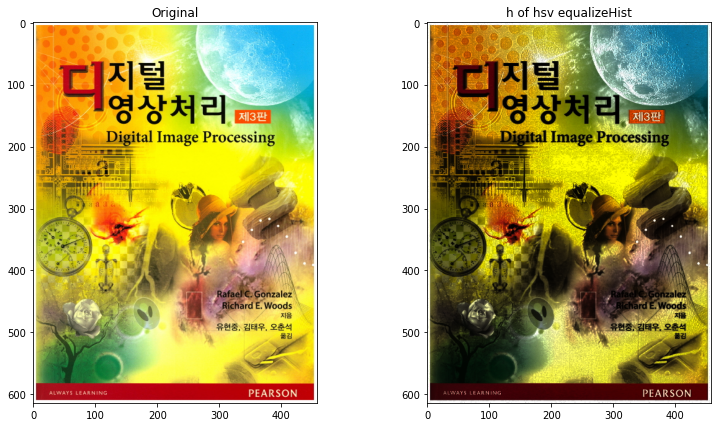

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/My Drive/image.jpg')

plt.figure(figsize=(20,7))

imgae1=plt.subplot(1,3,1)
imgae1.set_title('Original')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h,s,v2])
dst=cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
imgae2=plt.subplot(1,3,2)
imgae2.set_title('h of hsv equalizeHist')
plt.imshow(dst)

2.컬러사진 Histogram Equalization 결과 그래프로 보기

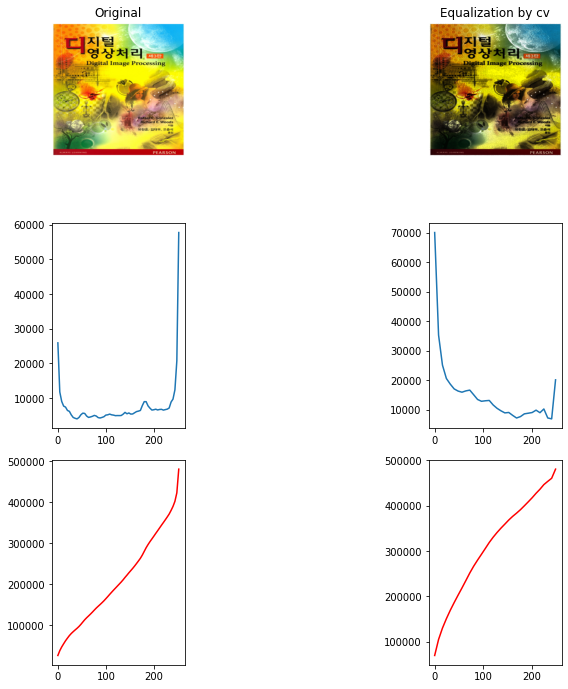

In [3]:
img = cv2.resize(img,(400,400))
dst = cv2.resize(dst,(400,400))


plt.figure(figsize=(8,10))

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(331),plt.imshow(img,'gray'),plt.title('Original')
plt.axis('off')


plt.subplot(333),plt.imshow(dst,'gray'),plt.title('Equalization by cv')
plt.axis('off')


bin_size = 4
hist, bins = np.histogram(img.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(334),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(337),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

bin_size = 8
hist, bins = np.histogram(dst.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(336),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(339),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

plt.tight_layout()
plt.show()

3.r,g,b histogram 그래프 관찰

(614, 458, 3)


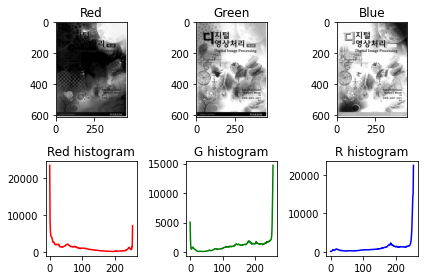

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/My Drive/image.jpg')

print(img.shape)
plt.imshow(img)

r,g,b = cv2.split(img)

plt.subplot(231)
plt.title('Red')
plt.imshow(r, cmap='gray')

plt.subplot(232)
plt.title('Green')
plt.imshow(g, cmap='gray')

plt.subplot(233)
plt.title('Blue')
plt.imshow(b, cmap='gray')

hist_r = cv2.calcHist([img], [0], None, [256], [0,256])
hist_g = cv2.calcHist([img], [1], None, [256], [0,256])
hist_b = cv2.calcHist([img], [2], None, [256], [0,256])

plt.subplot(234)
plt.title('Red histogram')
plt.plot(hist_r, color='r')

plt.subplot(235)
plt.title('G histogram')
plt.plot(hist_g, color='g')

plt.subplot(236)
plt.title('R histogram')
plt.plot(hist_b, color='b')

plt.tight_layout()